<a href="https://colab.research.google.com/github/SibeleTatiana/D_L-Models/blob/main/Predi%C3%A7%C3%A3o_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição_Fraude - DeepLearn**

## **Importando as bibliotecas e a base de dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, classification_report,
                           roc_curve, roc_auc_score,
                           precision_recall_curve, average_precision_score,
                           accuracy_score)

df = pd.read_csv("/home/creditcard.csv")

## **Análise Exploratória de Dados (EDA)**

### Primeiro explorei os dados basicos e pedi uma amostra dos dados

In [ ]:
print(f"""
{'='*180}\n
O tamanho do DataFrame:\n
Linhas: {df.shape[0]}
Colunas: {df.shape[1]}\n
{'='*180}\n
Amostra de dados:\n
""")
df.head()



O tamanho do DataFrame:

Linhas: 284807
Colunas: 31


Amostra de dados:




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Vericando os nomes dados colunas e tipo de dados por coluna

In [ ]:
print(f"""
Tipo de dados por colunas:\n
Colunas    tipo\n
{df.dtypes}
""")


Tipo de dados por colunas:

Colunas    tipo

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object



### Verificando se a valores nulos no DataFrame

In [ ]:
nulos = df.isnull().sum()
total_nulos = nulos.sum()
if total_nulos == 0:
    print("Não há valores nulos no DataFrame.")
else:
    print("Valores nulos encontrados:\n")
    print(nulos[nulos > 0])
    labels = ['Nulos', 'Não Nulos']
    valores = [total_nulos, df.size - total_nulos]
    plt.figure(figsize=(6, 6))
    plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title('Proporção de Valores Nulos no DataFrame')
    plt.axis('equal')
    plt.show()

Não há valores nulos no DataFrame.


### Como utilizarei a coluna "Class" como variável Target, é importante analisar o tipo de dados dessa coluna e propoção desses dados


Distribuição individual dos valores da coluna 'Class':

Classe 0: 284315 registros
Classe 1: 492 registros


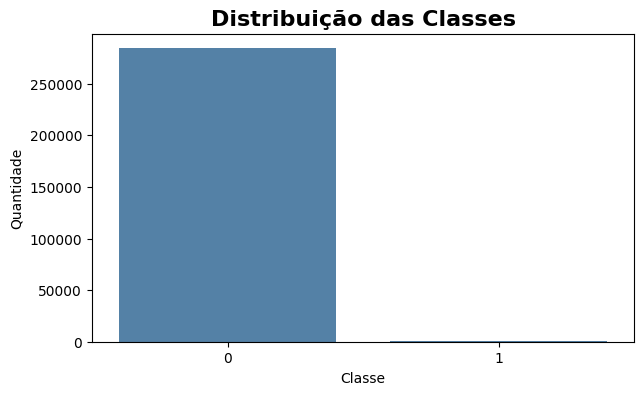

In [ ]:
valores_unicos = df['Class'].unique()
print("\nDistribuição individual dos valores da coluna 'Class':\n")
for valor in valores_unicos:
    contagem = df[df['Class'] == valor].shape[0]
    print(f"Classe {valor}: {contagem} registros")

plt.figure(figsize=(7, 4))
sns.countplot(x='Class', data=df, color='steelblue')
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.title("Distribuição das Classes", fontsize=16, fontweight="bold")
plt.show()

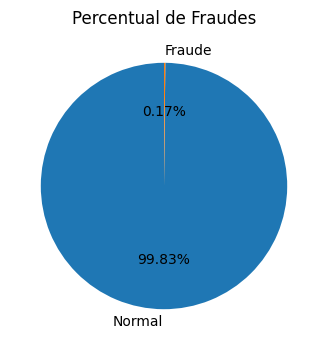

In [ ]:
counts = df['Class'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts.values, labels=['Normal','Fraude'], autopct='%1.2f%%', startangle=90)
plt.title('Percentual de Fraudes')
plt.show()

### Agora criarei uma matriz de correlação para vericar como ela se relaciona com as outras features

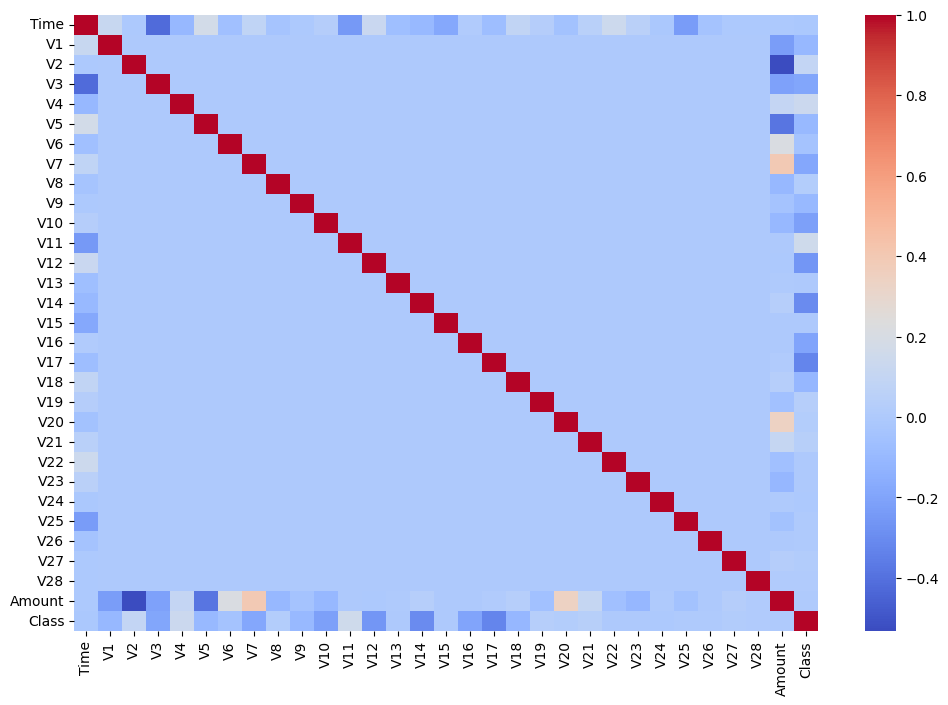

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

## **Features Engineering**

### Como não foi possível identificar uma correlação significativa entre as features, realizarei o balanceamento dos dados para analisar se isso melhora a relação entre as variáveis.

In [ ]:
df1 = df
valores_unicos = df1['Class'].unique()
min_count = min(df1[df1['Class'] == valor].shape[0] for valor in valores_unicos)
df_Class0 = df1[df1['Class'] == 0.0].sample(n=min_count)
df_Class1 = df1[df1['Class'] == 1.0].sample(n=min_count)
df1 = pd.concat([df_Class0, df_Class1])
print("\nDistribuição individual dos valores da coluna 'Class':\n")
for valor in valores_unicos:
    contagem = df1[df1['Class'] == valor].shape[0]
    print(f"Classe {valor}: {contagem} registros")


Distribuição individual dos valores da coluna 'Class':

Classe 0: 492 registros
Classe 1: 492 registros


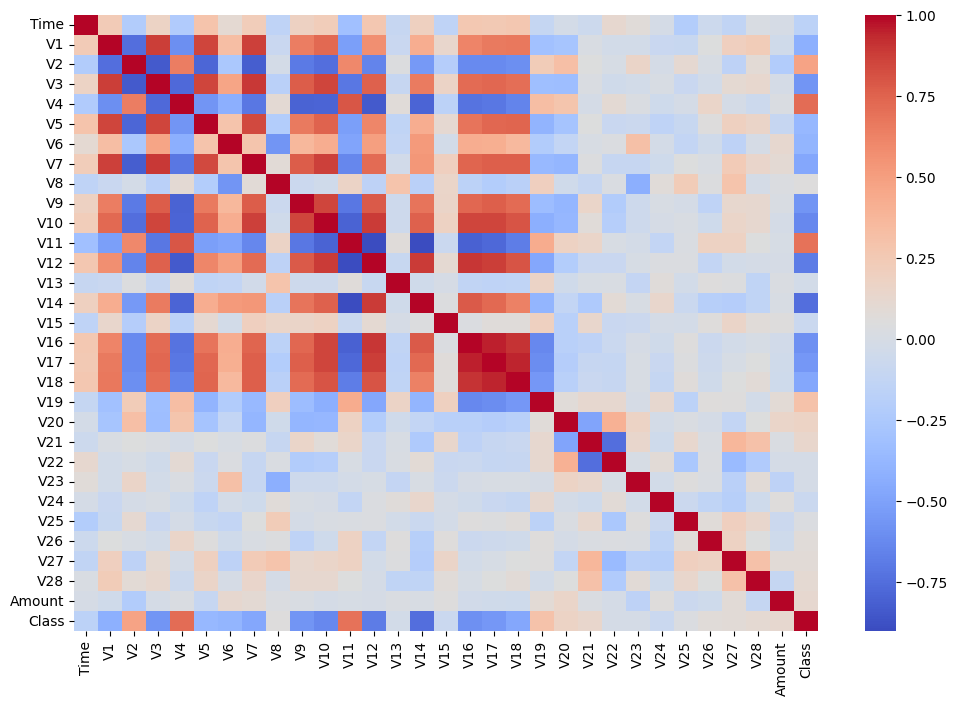

In [ ]:
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

### Com isso posso idetificar visualmente uma relação maior entres as features.

In [ ]:
corr_class = df1.corr()['Class'].abs()
correlacao = 0.65
features_correlacao = corr_class[corr_class > correlacao].index.tolist()
features_correlacao = [f for f in features_correlacao if f != 'Class']
print(f"Features com correlação acima de {correlacao*100:.0f}% são: {features_correlacao}")

Features com correlação acima de 65% são: ['V4', 'V11', 'V12', 'V14']


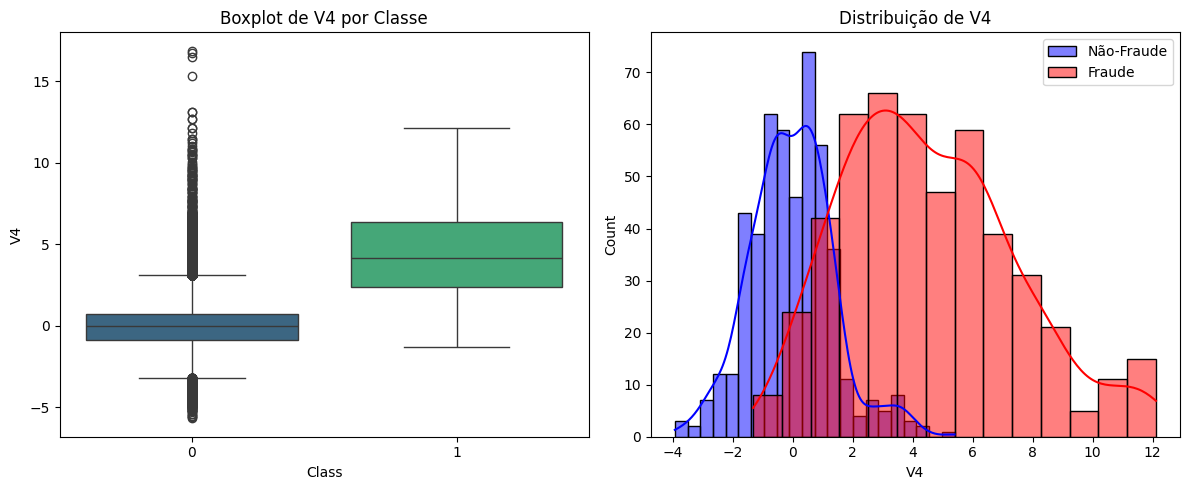

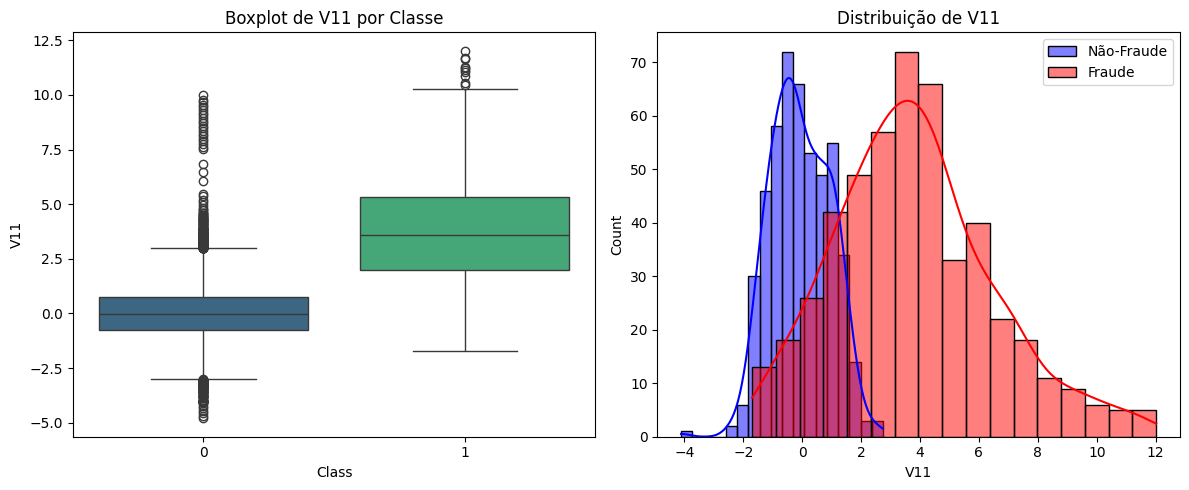

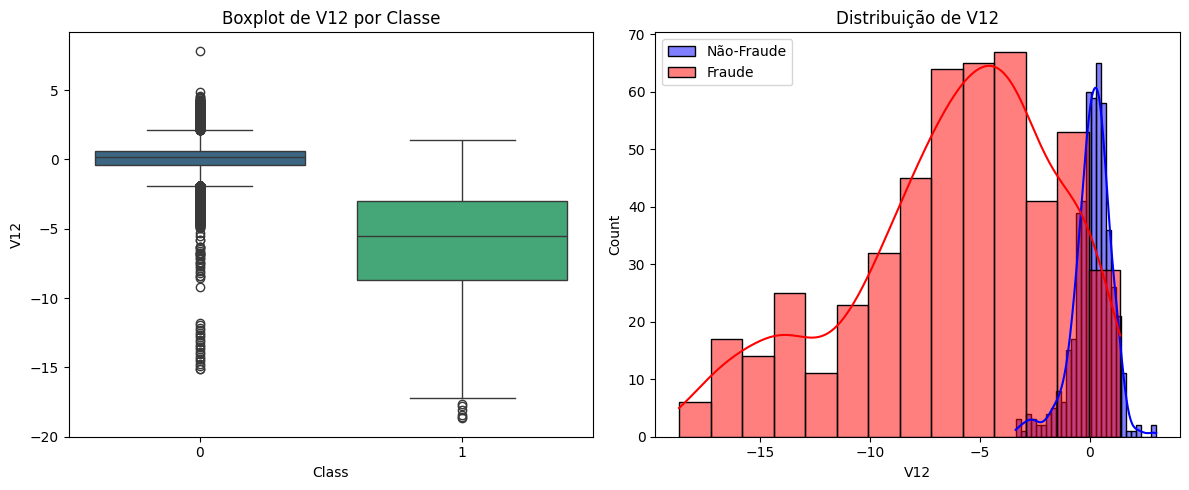

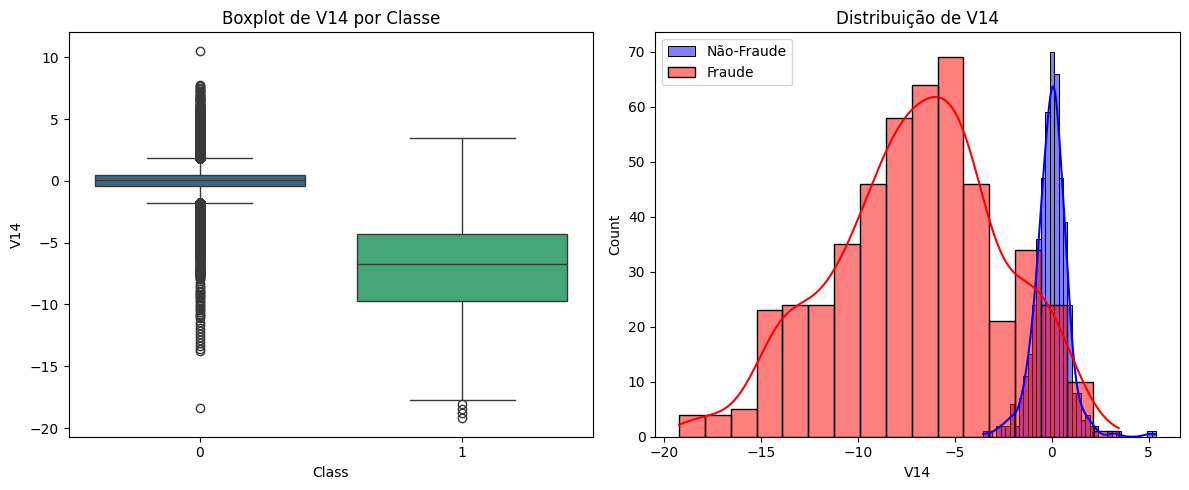

In [ ]:
def analyze_outliers(feature):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='Class', y=feature, data=df, hue='Class', palette='viridis', legend=False)
    plt.title(f'Boxplot de {feature} por Classe')

    plt.subplot(1, 2, 2)
    sns.histplot(df1[df1['Class'] == 0][feature], color='blue', label='Não-Fraude', kde=True)
    sns.histplot(df1[df1['Class'] == 1][feature], color='red', label='Fraude', kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.legend()

    plt.tight_layout()
    plt.show()

for feature in features_correlacao:
    analyze_outliers(feature)

### **Conclusão:**

In [ ]:
print(f"Podemos concluir que as melhores features para são predição: {features_correlacao}")

Podemos concluir que as melhores features para são predição: ['V4', 'V11', 'V12', 'V14']


## **Modelagem**

### Primeiro farei a divisão do x e y

In [ ]:
df2 = df1[features_correlacao + ['Class']]
X = df.drop("Class", axis=1)
y = df["Class"]

### Aplica normalização para deixar o processo mais rapido e dividimos em 50% treino e 50% teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Usarei um modelo de KNN (K-Nearest Neighbors), devido o número de dados ser bastante limitado.

In [ ]:
k_range = range(1, 11)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        verbose=10
    )
    mean_score = scores.mean()
    cv_scores.append(mean_score)
    print(f"k={k} → accuracy média: {mean_score:.4f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=1 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=2 → accuracy média: 0.9995


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   58.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=3 → accuracy média: 0.9995


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   57.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=4 → accuracy média: 0.9995


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.5min remaining:   58.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=5 → accuracy média: 0.9995


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   56.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=6 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   56.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=7 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   57.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=8 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   57.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


k=9 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.4min remaining:   57.0s


k=10 → accuracy média: 0.9994


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


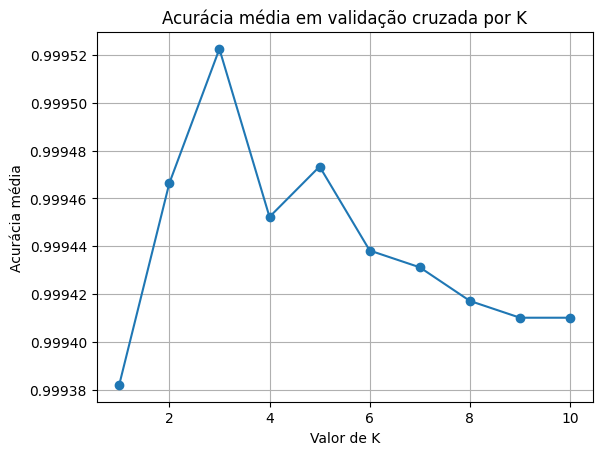

In [ ]:
plt.figure()
plt.plot(list(k_range), cv_scores, marker="o")
plt.title("Acurácia média em validação cruzada por K")
plt.xlabel("Valor de K")
plt.ylabel("Acurácia média")
plt.grid(True)
plt.show()

In [ ]:
best_k = k_range[np.argmax(cv_scores)]
print(f"Melhor K encontrado: {best_k}")

Melhor K encontrado: 3


### Treinando o modelo com o melhor K

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

### Avaliação no conjunto de teste

In [ ]:
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia no teste: 0.9994171512036178

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.94      0.71      0.81       246

    accuracy                           1.00    142404
   macro avg       0.97      0.85      0.90    142404
weighted avg       1.00      1.00      1.00    142404



### Matriz de confusão

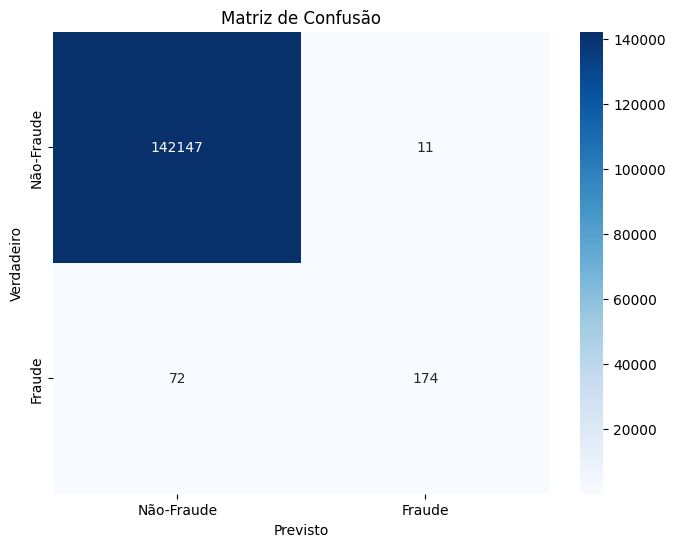

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não-Fraude', 'Fraude'],
            yticklabels=['Não-Fraude', 'Fraude'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### Reduzimos todas as features para 2 componentes

In [ ]:
pca = PCA(n_components=2)
X_all_pca = pca.fit_transform(
    np.vstack((X_train_scaled, X_test_scaled))
)
y_all_pca = np.hstack((y_train, y_test))

### Flag para separar treino e teste no plot

In [ ]:
mask_test = np.zeros_like(y_all_pca, dtype=bool)
mask_test[len(y_train):] = True

### Treinamos um novo KNN sobre o PCA apenas para plotar regiões de decisão

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_all_pca[~mask_test], y_all_pca[~mask_test])

KNeighborsClassifier(n_neighbors=3)

### Criando grid para contorno

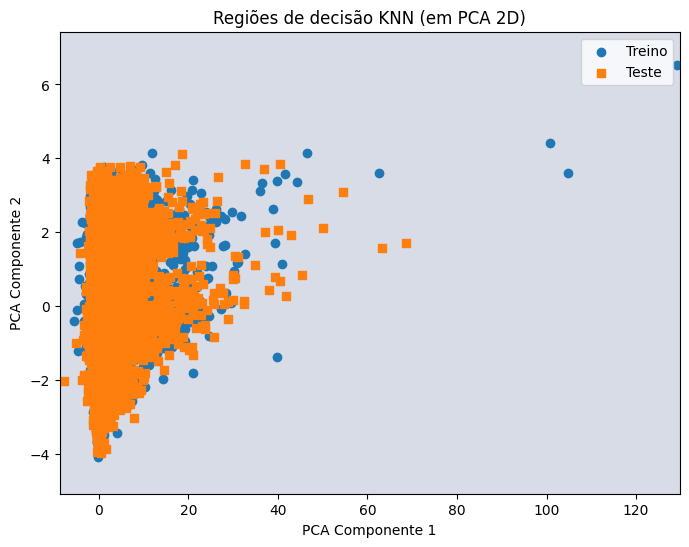

In [ ]:
x_min, x_max = X_all_pca[:,0].min() - 1, X_all_pca[:,0].max() + 1
y_min, y_max = X_all_pca[:,1].min() - 1, X_all_pca[:,1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.5),
    np.arange(y_min, y_max, 0.5)
)
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(
    X_all_pca[~mask_test,0],
    X_all_pca[~mask_test,1],
    marker="o",
    label="Treino"
)
plt.scatter(
    X_all_pca[mask_test,0],
    X_all_pca[mask_test,1],
    marker="s",
    label="Teste"
)
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.title("Regiões de decisão KNN (em PCA 2D)")
plt.legend()
plt.show()

## **Validado o modelo**

In [ ]:
y_proba = knn_final.predict_proba(X_test_scaled)[:, 1]

### Matriz de Confusão (não-normalizada e normalizada)

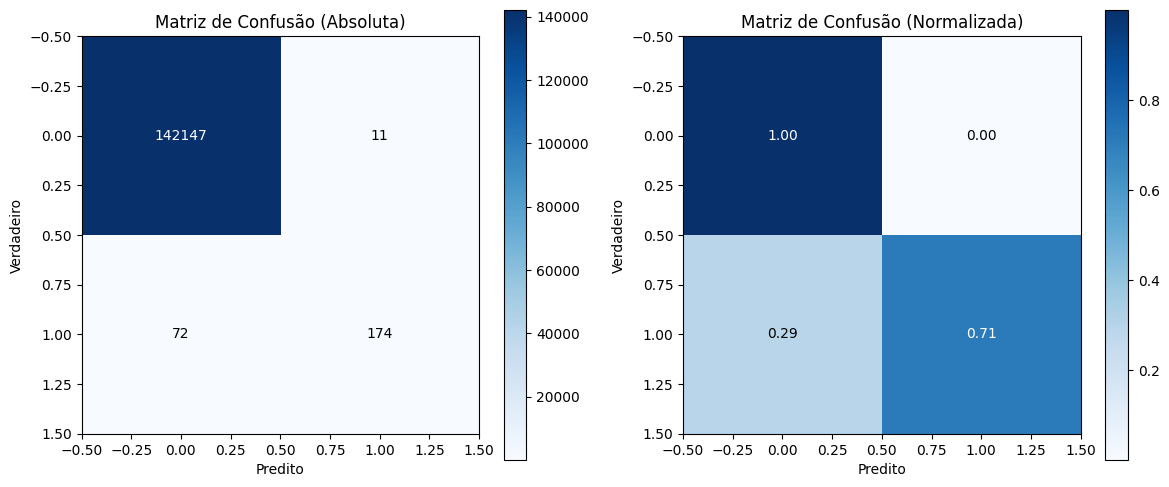

In [ ]:
cm = confusion_matrix(y_test, knn_final.predict(X_test_scaled))
cm_norm = confusion_matrix(y_test, knn_final.predict(X_test_scaled), normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, mat, title in zip(axes, [cm, cm_norm], ["Absoluta", "Normalizada"]):
    im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Matriz de Confusão ({title})")
    ax.set_xlabel("Predito")
    ax.set_ylabel("Verdadeiro")
    fig.colorbar(im, ax=ax)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(j, i, f"{mat[i, j]:.2f}" if title=="Normalizada" else int(mat[i, j]),
                    ha="center", va="center", color="white" if mat[i, j] > mat.max()/2 else "black")
plt.tight_layout()
plt.show()

### Relatório de Classificação

In [ ]:
print(classification_report(y_test, knn_final.predict(X_test_scaled),
      target_names=["Normal (0)", "Fraude (1)"]))

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00    142158
  Fraude (1)       0.94      0.71      0.81       246

    accuracy                           1.00    142404
   macro avg       0.97      0.85      0.90    142404
weighted avg       1.00      1.00      1.00    142404



### Curva ROC + AUC

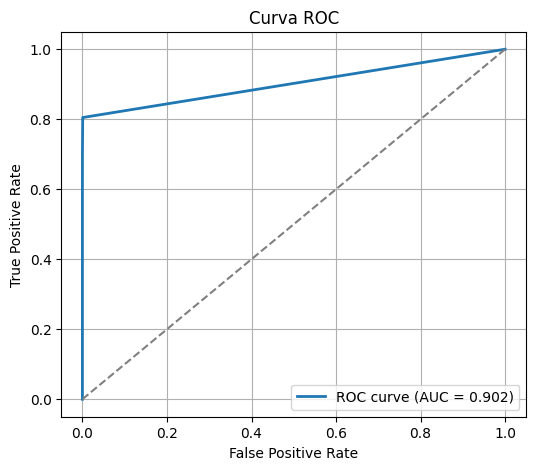

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Curva Precision‑Recall + AUC

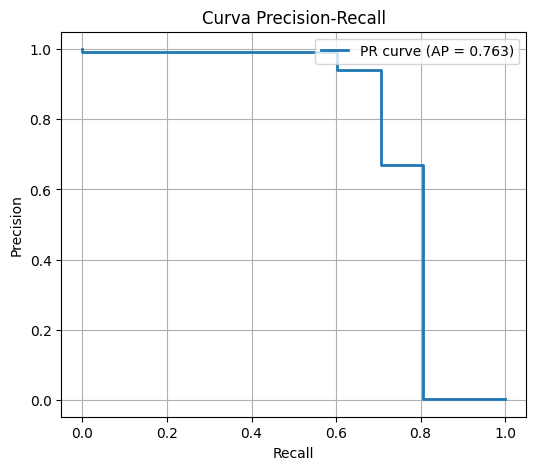

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.step(recall, precision, where='post', lw=2,
         label=f"PR curve (AP = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision‑Recall")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()